<h3>Importing packages</h3>

In [1]:
import pandas as pd
import numpy as np


<h3>Importing data</h3>

In [2]:
raw_csv_data=pd.read_csv('Index2018.csv')

In [3]:
df_comp=raw_csv_data.copy()

In [4]:
raw_csv_data.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [5]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


<h3>Plotting Data </h3>


In [6]:
import matplotlib.pyplot as plt

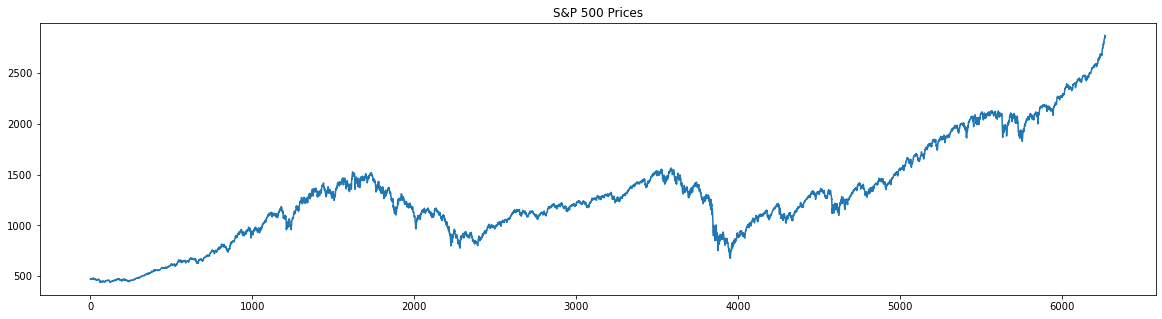

In [7]:
df_comp.spx.plot(figsize=(20,5,),title='S&P 500 Prices')
plt.show()

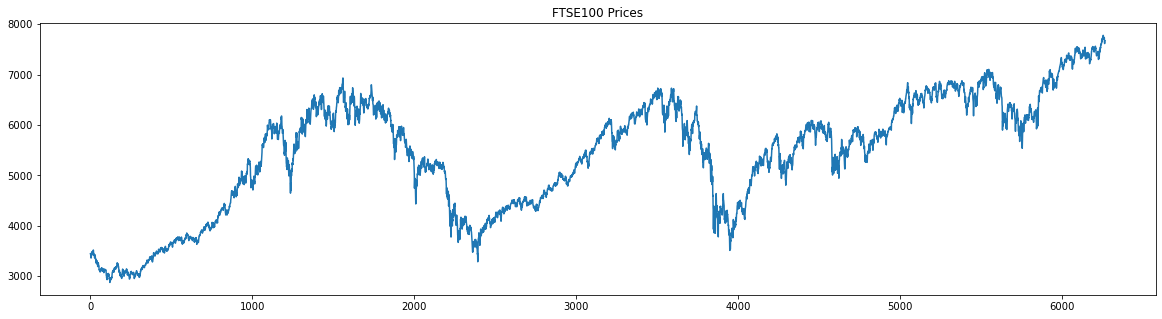

In [8]:
df_comp.ftse.plot(figsize=(20,5,),title='FTSE100 Prices')
plt.show()

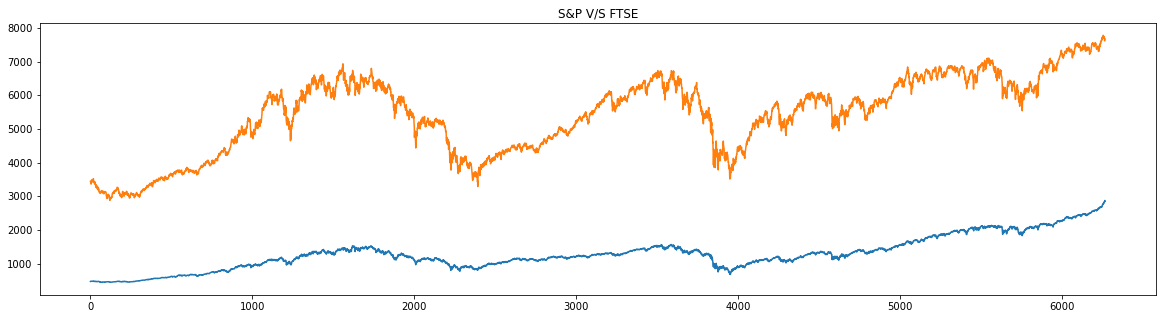

In [9]:
df_comp.spx.plot(figsize=(20,5,),title='S&P 500 Prices')
df_comp.ftse.plot(figsize=(20,5,),title='FTSE100 Prices')
plt.title('S&P V/S FTSE')
plt.show()

In [10]:
import scipy.stats
import pylab

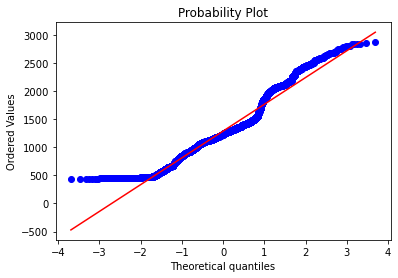

In [11]:
scipy.stats.probplot(df_comp.spx,plot=pylab)
pylab.show()

<h3>From text to Date</h3>

In [12]:
df_comp.date=pd.to_datetime(df_comp.date,dayfirst=True)

In [13]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [14]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [15]:
df_comp.set_index("date",inplace=True)

In [16]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


<h3>Setting desired Frequency</h3>

'h' - Hourly 'w'- weekly 'b'- business days 'd' - daily 'm' - monthly 'a' - annual

In [17]:
df_comp=df_comp.asfreq('b')

In [18]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


<h3>Handling Missing Values</h3>

In [19]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [20]:
#front-fill
df_comp.spx=df_comp.spx.fillna(method="ffill")

In [21]:
#back fill
df_comp.ftse=df_comp.ftse.fillna(method="bfill")

In [22]:
df_comp.dtypes

spx       float64
dax       float64
ftse      float64
nikkei    float64
dtype: object

In [23]:
df_comp.dax.mean()

6080.063362577768

In [24]:
df_comp.rename(columns={'spx':'market value'},inplace=True)

In [25]:
del df_comp['dax'],df_comp['ftse'],df_comp['nikkei']

<h3>Splitting Data</h3>

In [26]:
size=int(len(df_comp)*0.8)
df_train=df_comp[:size]
df_test=df_comp[size:]

In [27]:
display(df_train.tail())
display(df_test.head())

,market value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


,market value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


<h3>White Noise</h3>

In [31]:
df_train.rename(columns={'market value':'market_value'},inplace=True)

C:\Users\SF811YF\AppData\Local\Temp\ipykernel_13388\2189407503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'market value':'market_value'},inplace=True)


In [32]:
wn=np.random.normal(loc=df_train.market_value.mean(),scale=df_train.std(),size=len(df_train))

In [33]:
df_train['wn']=wn

C:\Users\SF811YF\AppData\Local\Temp\ipykernel_13388\343528387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['wn']=wn


In [34]:
df_train.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1087.642754
std,292.559287,289.625644
min,438.920000,-57.623629
25%,914.620000,889.785291
50%,1144.650000,1087.137769
75%,1316.280729,1282.510670
max,1570.252238,2193.307346


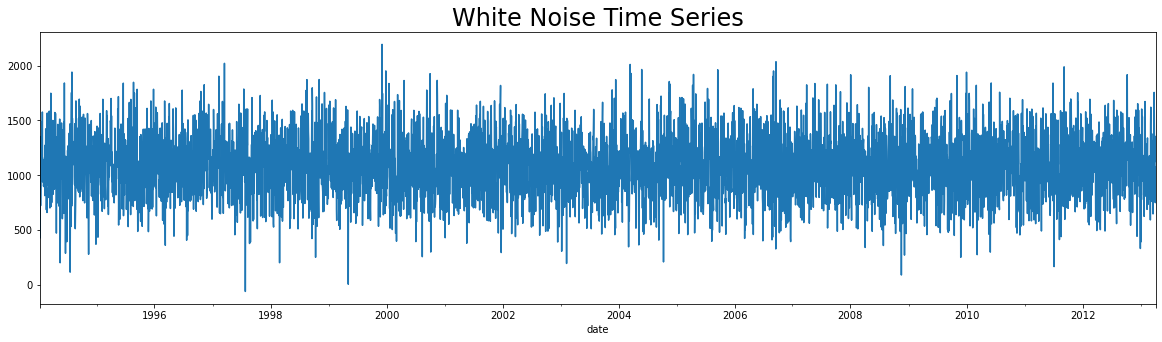

In [38]:
df_train.wn.plot(figsize=(20,5))
plt.title('White Noise Time Series',size =24)
plt.show()

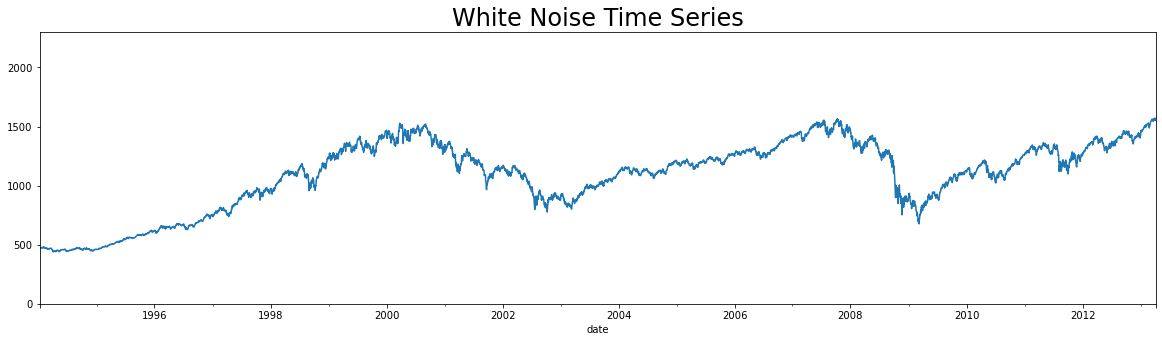

In [41]:
df_train.market_value.plot(figsize=(20,5))
plt.title('White Noise Time Series',size =24)
plt.ylim(0,2300)
plt.show()

<h3>Random Walk</h3>

In [42]:
rw=pd.read_csv('RandWalk.csv')

In [52]:
rw.date = pd.to_datetime(rw.date,dayfirst=True)
rw.set_index("date",inplace=True)


AttributeError: 'DataFrame' object has no attribute 'date'

In [56]:
df_train['rw']=rw.price

C:\Users\SF811YF\AppData\Local\Temp\ipykernel_13388\2289577038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['rw']=rw.price


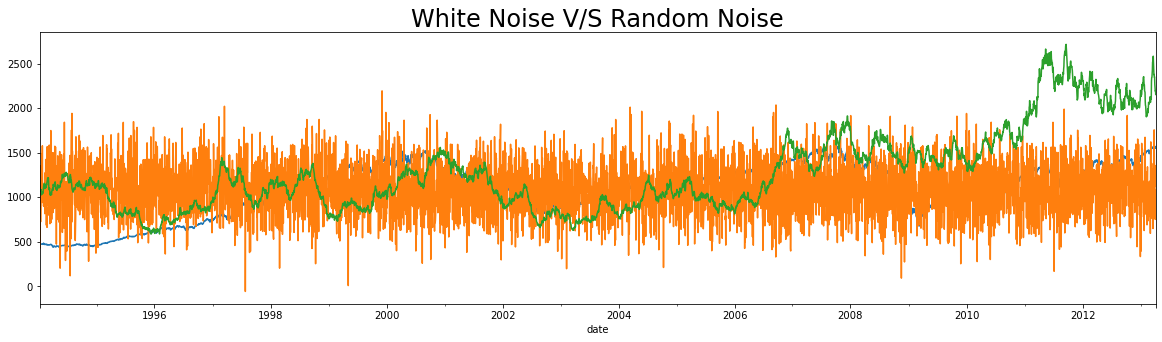

In [72]:
df_train.market_value.plot(figsize=(20,5))
df_train.wn.plot(figsize=(20,5))
df_train.rw.plot(figsize=(20,5))
plt.title('White Noise V/S Random Noise',size =24)
plt.show()
    

<h3>Stationarity</h3>

In [78]:
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.seasonal import seasonal_decompose

In [74]:
sts.adfuller(df_train.market_value)

(-1.7369847452352452,
 0.41216456967706144,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [75]:
sts.adfuller(df_train.wn)

(-31.046050249783466,
 0.0,
 5,
 5015,
 {'1%': -3.431654616214729,
  '5%': -2.862116499672828,
  '10%': -2.567076871409699},
 70713.81973320387)

<h3>Seasonality</h3>

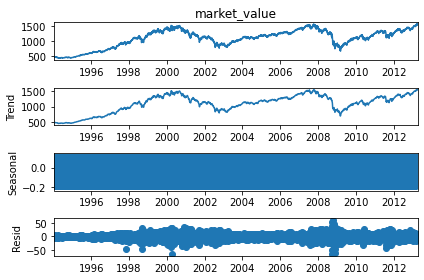

In [80]:
s_dec_addictive=seasonal_decompose(df_train.market_value,model='addictive')
s_dec_addictive.plot()
plt.show()

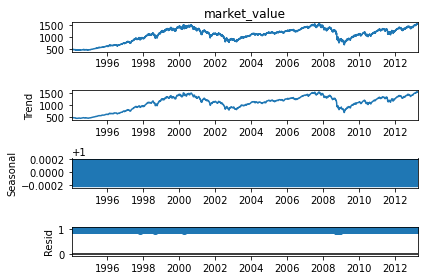

In [81]:
s_dec_multiplicative=seasonal_decompose(df_train.market_value,model='multiplicative')
s_dec_multiplicative.plot()
plt.show()

<h3>ACF</h3>

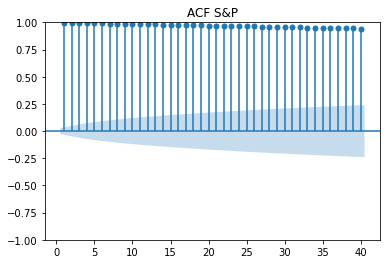

In [86]:
sgt.plot_acf(df_train.market_value,lags=40,zero=False)
plt.title('ACF S&P')
plt.show()

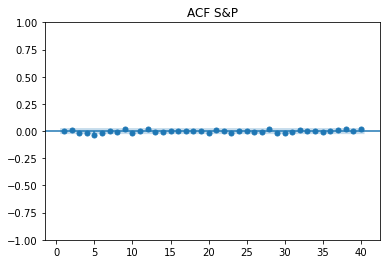

In [87]:
sgt.plot_acf(df_train.wn,lags=40,zero=False)
plt.title('ACF S&P')
plt.show()

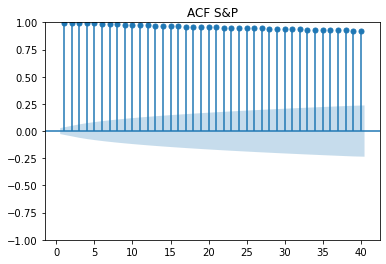

In [90]:
sgt.plot_acf(df_train.rw,lags=40,zero=False)
plt.title('ACF S&P')
plt.show()

<h3>PACF</h3>

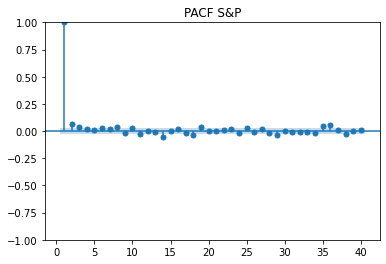

In [91]:
sgt.plot_pacf(df_train.market_value,lags=40,zero=False,method=('ols'))
plt.title('PACF S&P')
plt.show()

In [2]:
print('hello')

hello
